In [1]:
%matplotlib inline
%config InlineBackend.figure.format = 'retina'

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("poster", font_scale=1.3)
import folium


import pandas as pd
import numpy as np

import os, sys
import warnings
warnings.filterwarnings('ignore')

import pivottablejs
import missingno as msno
import pandas_profiling

import ipywidgets as widgets

In [2]:
mpl_update = {'font.size':14,
              'xtick.labelsize':10,
              'ytick.labelsize':10,
              'figure.figsize':[10.0,6.0], #12, 8
              'axes.color_cycle':['#0055A7', '#2C3E4F', '#26C5ED', '#00cc66', '#D34100', '#FF9700','#091D32'], 
              'axes.labelsize':14,
              'axes.labelcolor':'#677385',
              'axes.titlesize':20,
              'lines.color':'#0055A7',
              'lines.linewidth':3,
              'text.color':'#677385'}
mpl.rcParams.update(mpl_update)

In [4]:
#dfParis = pd.read_pickle('airbnb_paris/airbnb_paris_updt_0615.p')
dfParis = pd.read_pickle('../data/airbnb_paris_updt_0915.p')

In [5]:
dfParis.head()

,accommodates,amenities,availability_30,availability_60,availability_90,bathrooms,bedrooms,beds,cancellation_policy,guests_included,...,Musee d'Orsay,Sainte-Chapelle,Palais Garnier - Opera,Notre Dame Cathedral,Musee de l'Orangerie,Pont Alexandre III,closest_attraction,attraction_dist,site_count,close_to_attraction
0,4,"TV,Internet,Wireless Internet,Kitchen,Elevator...",0,0,0,1,1.0,2.0,moderate,1,...,1.154827,2.000035,1.658965,2.244348,1.037013,0.667815,Eiffel Tower,0.308732,2.0,1.0
1,4,"TV,Wireless Internet,Kitchen,Heating,Family/ki...",8,13,32,1,1.0,1.0,strict,1,...,1.358051,2.138114,1.955560,2.361434,1.299772,0.969841,Eiffel Tower,0.323356,2.0,1.0
2,4,"TV,Cable TV,Internet,Wireless Internet,Kitchen...",9,21,31,1,1.0,1.0,strict,2,...,0.103893,0.792191,0.860844,1.063107,0.398636,0.751408,Musee d'Orsay,0.103893,6.0,1.0
3,2,"TV,Internet,Wireless Internet,Kitchen,Indoor f...",0,0,0,1,1.0,1.0,moderate,1,...,0.894720,1.462830,1.712477,1.651705,1.025962,0.950404,Musee d'Orsay,0.894720,2.0,1.0
4,4,"TV,Wireless Internet,Kitchen,Elevator in build...",10,22,29,1,1.0,1.0,strict,1,...,0.983351,1.861174,1.413965,2.117998,0.819837,0.427010,Pont Alexandre III,0.427010,4.0,1.0


## Exploring distribution of price for Airbnb rental properties in Paris

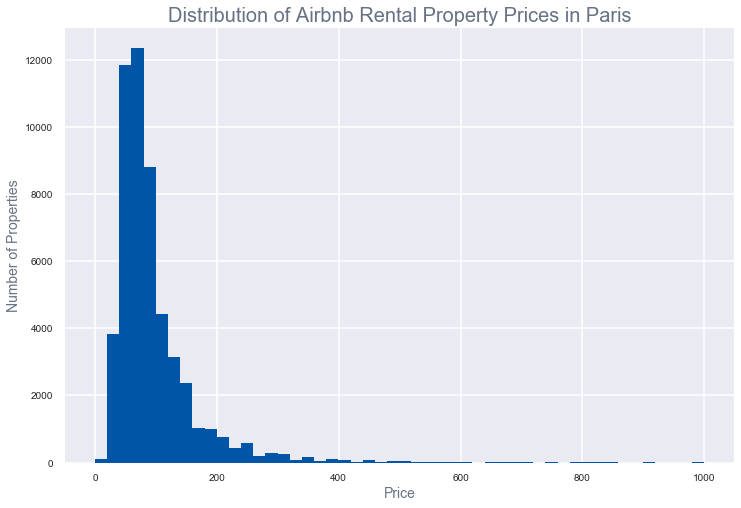

In [6]:
fig, ax = plt.subplots(figsize=(12,8))
ax.hist(dfParis.price,bins=50)
ax.set_xlabel('Price')
ax.set_ylabel('Number of Properties')
ax.set_title('Distribution of Airbnb Rental Property Prices in Paris')

plt.savefig('../images/airbnb_price_dist.png', bbox_inches='tight')
plt.show()

In [7]:
dfParis.groupby('property_type').id.count()

property_type
Apartment             49980
Bed & Breakfast         377
Boat                     29
Boutique hotel          108
Bungalow                  2
Cabin                    13
Camper/RV                 2
Cave                      2
Condominium             238
Dorm                     62
Earth House               2
Guesthouse               65
Hostel                   33
House                   534
Igloo                     2
Loft                    585
Other                   151
Serviced apartment       27
Timeshare                 3
Tipi                      1
Townhouse                71
Treehouse                 1
Villa                     7
Name: id, dtype: int64

#### Explore prices by location

In [11]:
dfParis['price'].describe()

count    52295.000000
mean        93.718673
std         71.128178
min          0.000000
25%         55.000000
50%         75.000000
75%        105.000000
max        999.000000
Name: price, dtype: float64

In [12]:
byArr = dfParis.sort_values(by='arrondissement')
xlabels = byArr[['arrondissement','arrond_name']].sort_values(by='arrondissement').drop_duplicates()
xlabels_text = []
for i, name in xlabels.iterrows():
    txt = str(name['arrondissement']) + '-' + name['arrond_name']
    xlabels_text.append(txt)

In [13]:
xlabels_text

['1-Louvre',
 '2-Bourse',
 '3-Temple',
 '4-Hotel-de-Ville',
 '5-Pantheon',
 '6-Luxembourg',
 '7-Palais-Bourbon',
 '8-Elysee',
 '9-Opera',
 '10-Entrepot',
 '11-Popincourt',
 '12-Reuilly',
 '13-Gobelins',
 '14-Observaitoire',
 '15-Vaugirard',
 '16-Passy',
 '17-Batignolles-Monceau',
 '18-Butte-Montmartre',
 '19-Buttes-Chaumont',
 '20-Menilmontant']

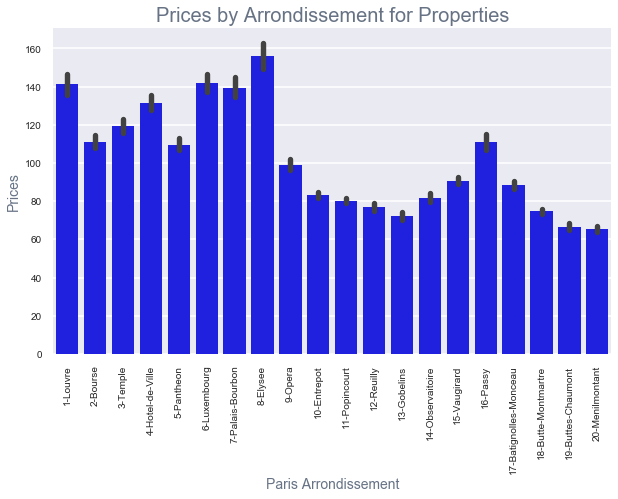

In [15]:
byArr = dfParis.sort_values(by='arrondissement')
fig = plt.figure(figsize=(7,4))
bar, ax = plt.subplots() 
ax = sns.barplot( x='arrondissement', y='price', data=byArr, color='blue') 
ax.set_title('Prices by Arrondissement for Properties') 
ax.set_xlabel('Paris Arrondissement') 
ax.set_ylabel('Prices') 
ax.set_xticklabels(labels=xlabels_text, rotation=90) 
plt.savefig('../images/airbnb_price_byArr.png', bbox_inches='tight')

In [16]:
byArr.rating_ind.value_counts()

1    38803
0    13492
Name: rating_ind, dtype: int64

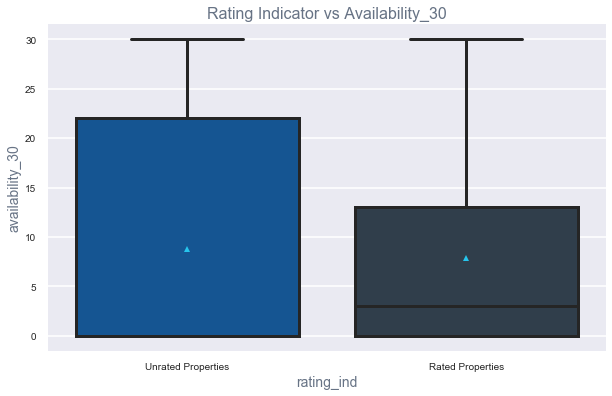

In [17]:
sns.boxplot(x=byArr['rating_ind'], y=byArr['availability_30'], showmeans=True)
plt.title('Rating Indicator vs Availability_30',fontsize=16 )
plt.xticks([0,1],['Unrated Properties', 'Rated Properties'])
plt.savefig('../images/box_rating_avail.png', bbox_inches='tight')
plt.show()


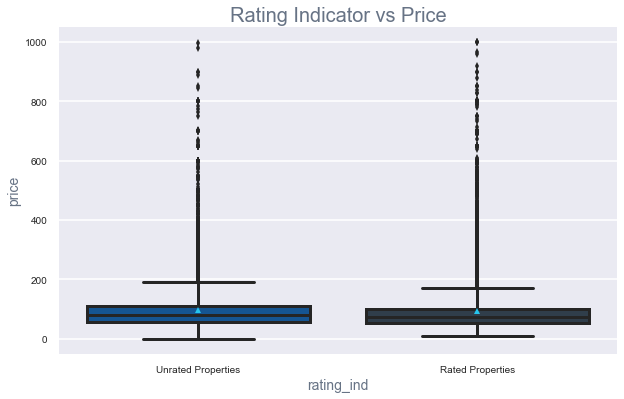

In [18]:
sns.boxplot(x=byArr['rating_ind'], y=byArr['price'], showmeans=True)
plt.title('Rating Indicator vs Price',fontsize=20 )
plt.xticks([0,1],['Unrated Properties', 'Rated Properties'])
plt.savefig('../images/box_ratingprice.png', bbox_inches='tight')
plt.show()

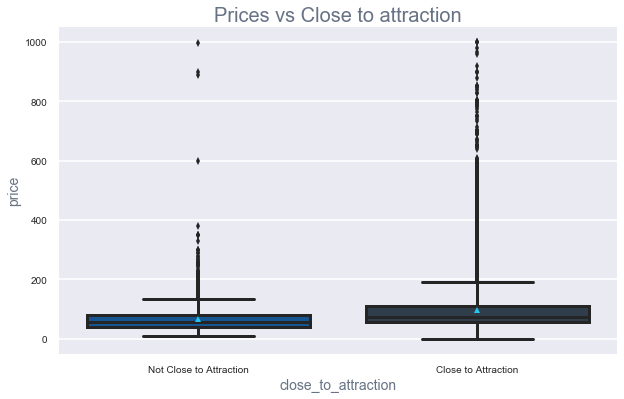

In [19]:
sns.boxplot(x=byArr['close_to_attraction'], y=byArr['price'], showmeans=True)
plt.title('Prices vs Close to attraction',fontsize=20 )
plt.xticks([0,1],['Not Close to Attraction', 'Close to Attraction'])
plt.savefig('../images/box_price_attraction.png', bbox_inches='tight')
plt.show()

In [20]:
dfParis.groupby('close_to_attraction').price.mean()

close_to_attraction
0.0    66.744099
1.0    95.967951
Name: price, dtype: float64

In [21]:
dfParis.groupby('close_to_attraction').price.median()

close_to_attraction
0.0    57.0
1.0    75.0
Name: price, dtype: float64

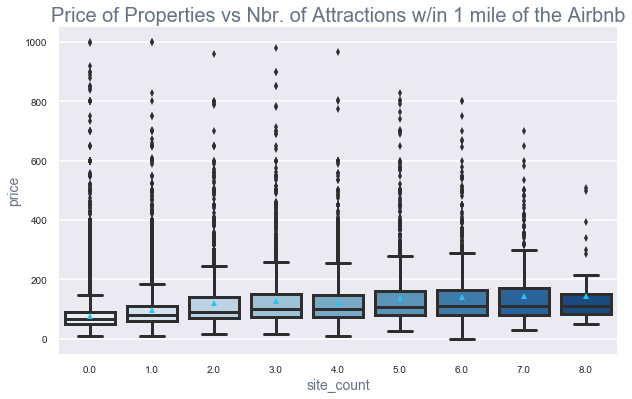

In [22]:
sns.boxplot(x=dfParis['site_count'], y=dfParis['price'], showmeans=True,palette="Blues")
plt.title('Price of Properties vs Nbr. of Attractions w/in 1 mile of the Airbnb',fontsize=20 )
#plt.xticks([0,1],['Not Close to Attraction', 'Close to Attraction'])
plt.savefig('../images/box_recmd_price_vs_Fullsitecount.png', bbox_inches='tight')
plt.show()

In [23]:
### Visualization using Recommended records

In [24]:
import pandas as pd
dfParis2 = pd.read_pickle('../data/airbnb_paris_recommend_0615.p')
#these are records where close_to_attraction = 1 and near_station = 1

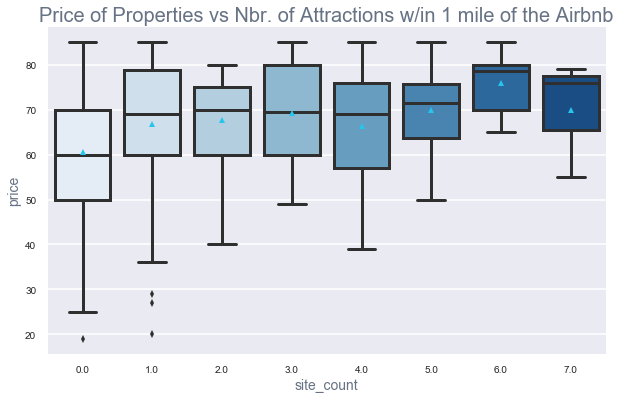

In [25]:
sns.boxplot(x=dfParis2['site_count'], y=dfParis2['price'], showmeans=True,palette="Blues")
plt.title('Price of Properties vs Nbr. of Attractions w/in 1 mile of the Airbnb',fontsize=20 )
#plt.xticks([0,1],['Not Close to Attraction', 'Close to Attraction'])
plt.savefig('../images/box_recmd_price_vs_sitecount.png', bbox_inches='tight')
plt.show()

In [26]:
dfParis2.groupby('site_count').id.count()

site_count
0.0    786
1.0    254
2.0     25
3.0     24
4.0     23
5.0     16
6.0      8
7.0      3
Name: id, dtype: int64

In [27]:
dfParis2.groupby('station_count').id.count()

station_count
0.0    237
1.0    557
2.0    257
3.0     72
4.0     16
Name: id, dtype: int64

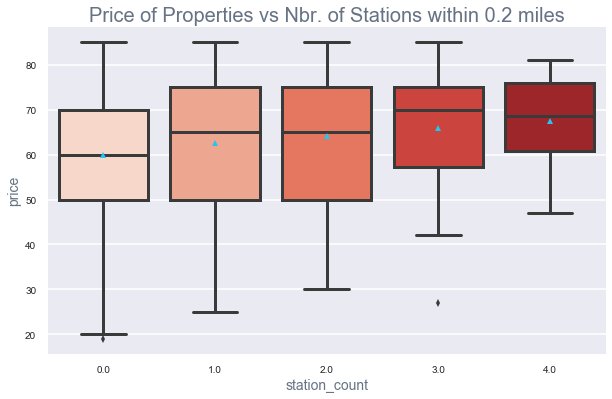

In [28]:
sns.boxplot(x=dfParis2['station_count'], y=dfParis2['price'], showmeans=True,palette="Reds")
plt.title('Price of Properties vs Nbr. of Stations within 0.2 miles',fontsize=20 )
#plt.xticks([0,1],['Not Close to Attraction', 'Close to Attraction'])
plt.savefig('../images/box_recmd_price_vs_stncount.png', bbox_inches='tight')
plt.show()

In [30]:
property_median = dfParis.groupby('arrondissement')['price'].median().reset_index()
property_mean = dfParis.groupby('arrondissement')['price'].mean().reset_index()


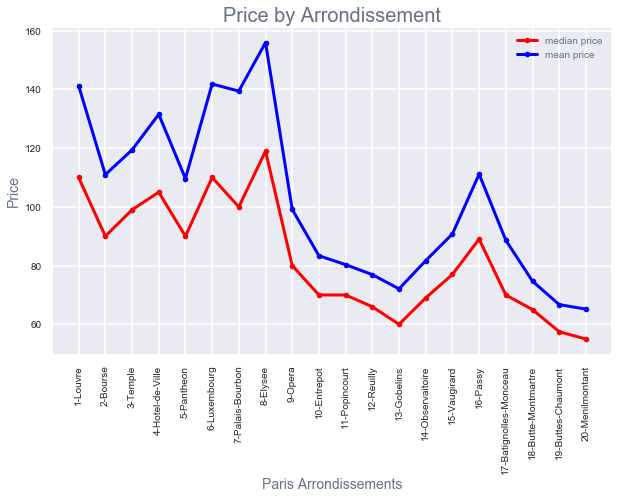

In [31]:
fig = plt.figure(figsize=(10,6))
plt.plot(property_median['arrondissement'], property_median['price'], marker='.', color='red', label='median price')
plt.plot(property_mean['arrondissement'], property_mean['price'], marker='.', color='blue',label='mean price')
plt.xlabel('Paris Arrondissements')
plt.xticks([x for x in range(1,21)],xlabels_text,rotation=90)
plt.ylabel('Price')
plt.title("Price by Arrondissement")
plt.legend(fontsize=10)
plt.savefig('../images/line_pricebyArr.png', bbox_inches='tight')
plt.show()

In [33]:
byArr.availability_30.describe()

count    52295.000000
mean         8.086509
std         10.562247
min          0.000000
25%          0.000000
50%          3.000000
75%         14.000000
max         30.000000
Name: availability_30, dtype: float64

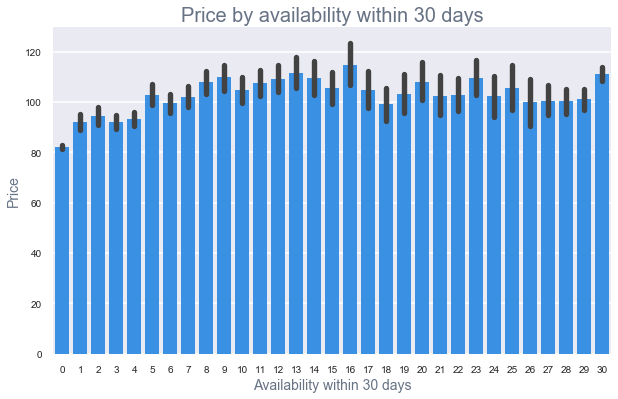

In [34]:
fig = plt.figure(figsize=(10,6))
bar, ax = plt.subplots() 
ax = sns.barplot( x='availability_30', y='price', data=byArr, color='dodgerblue') 
ax.set_title('Price by availability within 30 days') 
ax.set_xlabel('Availability within 30 days') 
ax.set_ylabel('Price') 
#ax.set_xticklabels(labels=byArr['arrondissement'].unique()) 
plt.savefig('../images/airbnb_price_byAvail.png', bbox_inches='tight')

In [35]:
dfParis.columns

Index(['accommodates', 'amenities', 'availability_30', 'availability_60',
       'availability_90', 'bathrooms', 'bedrooms', 'beds',
       'cancellation_policy', 'guests_included', 'host_since',
       'host_total_listings_count', 'id', 'last_review', 'latitude',
       'longitude', 'minimum_nights', 'neighbourhood_cleansed',
       'number_of_reviews', 'price', 'property_type', 'review_scores_accuracy',
       'review_scores_checkin', 'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_rating', 'review_scores_value', 'reviews_per_month',
       'room_type', 'summary', 'transit', 'zipcode', 'arrondissement',
       'arrond_name', 'rating_ind', 'Eiffel Tower', 'The Louvre',
       'Jardin du Luxembourg', 'Le Marais', 'Musee d'Orsay', 'Sainte-Chapelle',
       'Palais Garnier - Opera', 'Notre Dame Cathedral',
       'Musee de l'Orangerie', 'Pont Alexandre III', 'closest_attraction',
       'attraction_dist', 'site_count', 'c

In [36]:
len(dfParis)

52295

In [37]:
dfParis['close_to_attraction'].value_counts()

1.0    48270
0.0     4025
Name: close_to_attraction, dtype: int64

In [38]:
dfParis.groupby(['close_to_attraction','closest_attraction']).agg({'attraction_dist':'mean'}).reset_index()

,close_to_attraction,closest_attraction,attraction_dist
0,0.0,Eiffel Tower,2.140840
1,0.0,Jardin du Luxembourg,2.140048
2,0.0,Le Marais,2.284282
3,0.0,Notre Dame Cathedral,2.132849
4,0.0,Palais Garnier - Opera,2.267575
5,0.0,Pont Alexandre III,2.027111
6,1.0,Eiffel Tower,1.076003
7,1.0,Jardin du Luxembourg,1.006852
8,1.0,Le Marais,1.017788
9,1.0,Musee d'Orsay,0.474307


In [39]:
dfParis[['Eiffel Tower',
       'The Louvre', 'Jardin du Luxembourg', 'Le Marais', "Musee d'Orsay",
       'Sainte-Chapelle', 'Palais Garnier - Opera', 'Notre Dame Cathedral',
       "Musee de l'Orangerie", 'Pont Alexandre III',
       'attraction_dist']].describe()

,Eiffel Tower,The Louvre,Jardin du Luxembourg,Le Marais,Musee d'Orsay,Sainte-Chapelle,Palais Garnier - Opera,Notre Dame Cathedral,Musee de l'Orangerie,Pont Alexandre III,attraction_dist
count,52295.000000,52295.000000,52295.000000,52295.000000,52295.000000,52295.000000,52295.000000,52295.000000,52295.000000,52295.000000,52295.000000
mean,2.871203,1.855253,2.169652,1.829213,2.023103,1.872022,1.951082,1.914558,2.079279,2.289150,1.096682
std,1.121221,0.734653,0.852046,0.926747,0.751456,0.779657,0.858758,0.828669,0.784861,0.875292,0.584545
min,0.042834,0.063781,0.059059,0.000525,0.010211,0.031901,0.037069,0.014616,0.028544,0.148769,0.000525
25%,2.125511,1.331527,1.540379,1.069213,1.493823,1.288491,1.297516,1.260155,1.523262,1.666449,0.620602
50%,2.875436,1.886296,2.215699,1.838955,2.012595,1.932717,1.823023,1.966552,2.019967,2.196745,1.050822
75%,3.649814,2.362039,2.884158,2.455695,2.483192,2.459444,2.592865,2.537588,2.566575,2.847719,1.506127
max,7.836751,6.061368,5.735027,5.842530,6.503040,5.608663,6.665486,5.492734,6.769616,7.152172,5.138806


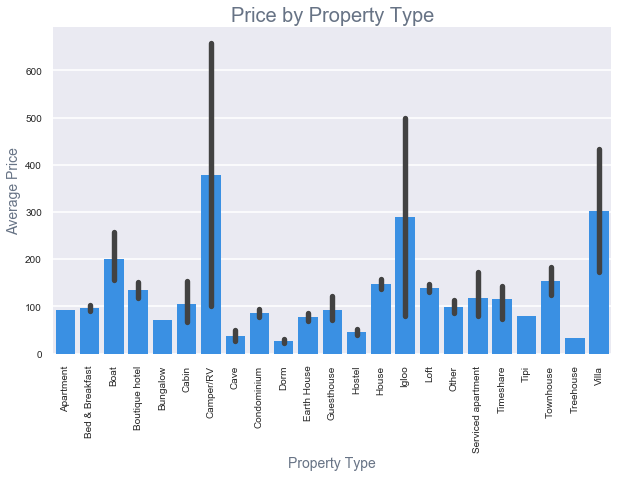

In [40]:
by_ptype = dfParis.sort_values(by='property_type')

fig = plt.figure(figsize=(12,10))
bar, ax = plt.subplots() 
ax = sns.barplot( x='property_type', y='price', data=by_ptype, color='dodgerblue') 
ax.set_title('Price by Property Type') 
ax.set_xlabel('Property Type') 
ax.set_ylabel('Average Price') 
ax.set_xticklabels(labels=by_ptype['property_type'].unique(), rotation=90) 
plt.savefig('../images/airbnb_price_byPtype.png', bbox_inches='tight')

In [41]:
temp = dfParis.groupby('property_type').id.count()/dfParis.groupby('property_type').id.count().sum()*100

In [42]:
temp.reset_index()
temp = pd.DataFrame(temp)
temp.reset_index()

,property_type,id
0,Apartment,95.573191
1,Bed & Breakfast,0.720910
2,Boat,0.055455
3,Boutique hotel,0.206521
4,Bungalow,0.003824
5,Cabin,0.024859
6,Camper/RV,0.003824
7,Cave,0.003824
8,Condominium,0.455110
9,Dorm,0.118558


In [43]:
temp['median_price']= dfParis.groupby('property_type').price.median()

In [44]:
temp.reset_index()

,property_type,id,median_price
0,Apartment,95.573191,75.0
1,Bed & Breakfast,0.720910,79.0
2,Boat,0.055455,170.0
3,Boutique hotel,0.206521,115.0
4,Bungalow,0.003824,72.0
5,Cabin,0.024859,64.0
6,Camper/RV,0.003824,379.0
7,Cave,0.003824,38.0
8,Condominium,0.455110,69.0
9,Dorm,0.118558,20.5


In [45]:
temp.rename(columns={'id': 'pct_count'}, inplace=True)

In [46]:
temp.reset_index()

,property_type,pct_count,median_price
0,Apartment,95.573191,75.0
1,Bed & Breakfast,0.720910,79.0
2,Boat,0.055455,170.0
3,Boutique hotel,0.206521,115.0
4,Bungalow,0.003824,72.0
5,Cabin,0.024859,64.0
6,Camper/RV,0.003824,379.0
7,Cave,0.003824,38.0
8,Condominium,0.455110,69.0
9,Dorm,0.118558,20.5


In [47]:
features = dfParis[dfParis.review_scores_rating > 0][['accommodates', 'availability_30', 'bathrooms', 'bedrooms',
       'beds', 'price', 'review_scores_accuracy',
       'review_scores_checkin', 'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_rating', 'review_scores_value', 'reviews_per_month','arrondissement', 'Eiffel Tower',
       'The Louvre', 'Jardin du Luxembourg', 'Le Marais', "Musee d'Orsay",
       'Sainte-Chapelle', 'Palais Garnier - Opera', 'Notre Dame Cathedral',
       "Musee de l'Orangerie", 'Pont Alexandre III',
       'attraction_dist','close_to_attraction']]

In [48]:
features['reviews_per_month'] = features[['reviews_per_month']].apply(pd.to_numeric) 

In [49]:
features = features[pd.notnull(features.availability_30)]
features = features[pd.notnull(features.beds)]
features = features[pd.notnull(features.bedrooms)]
features = features[pd.notnull(features.bathrooms)]

In [50]:
features1 = features[['availability_30','accommodates', 'bathrooms', 'bedrooms',
       'beds', 'price']]

In [51]:
len(features1)

38684

In [52]:
features1 = features1[pd.notnull(features1.availability_30)]

In [53]:
features1['accommodates'].isnull().sum()

0

In [54]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38684 entries, 0 to 52337
Data columns (total 27 columns):
accommodates                   38684 non-null int64
availability_30                38684 non-null int64
bathrooms                      38684 non-null object
bedrooms                       38684 non-null float64
beds                           38684 non-null float64
price                          38684 non-null float64
review_scores_accuracy         38565 non-null float64
review_scores_checkin          38547 non-null float64
review_scores_cleanliness      38590 non-null float64
review_scores_communication    38585 non-null float64
review_scores_location         38554 non-null float64
review_scores_rating           38684 non-null float64
review_scores_value            38548 non-null float64
reviews_per_month              38684 non-null float64
arrondissement                 38684 non-null int64
Eiffel Tower                   38684 non-null float64
The Louvre                     386

### Plot correlation of other variables with the property price

In [55]:
recent_corr = features.corr().loc['price'].drop(['price'])

In [60]:
def conditional_bar(series, bar_colors=None, color_labels=None, figsize=(8,12),
                   xlabel=None, by=None, ylabel=None, title=None):
    fig, ax  = plt.subplots(figsize=figsize)
    if not bar_colors:
        bar_colors = mpl.rcParams['axes.prop_cycle'].by_key()['color'][0]
    plt.barh(range(len(series)),series.values, color=bar_colors)
    plt.xlabel('' if not xlabel else xlabel);
    plt.ylabel('' if not ylabel else ylabel)
    plt.yticks(range(len(series)), series.index.tolist())
    plt.title('' if not title else title);
    plt.ylim([-1,len(series)]);
    if color_labels:
        for col, lab in color_labels.items():
            plt.plot([], linestyle='',marker='s',c=col, label= lab);
        lines, labels = ax.get_legend_handles_labels();
        ax.legend(lines[-len(color_labels.keys()):], labels[-len(color_labels.keys()):], loc='upper right');
    plt.close()
    fig.savefig('../images/features_corr.png', bbox_inches='tight')
    return fig

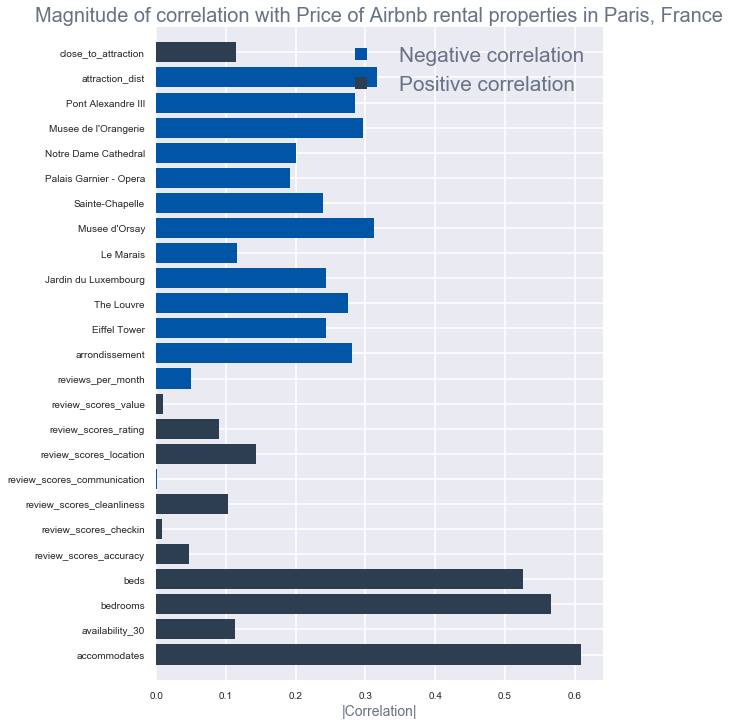

In [61]:
bar_colors = ['#0055A7' if x else '#2C3E4F' for x in list(recent_corr.values < 0)]
color_labels = {'#0055A7':'Negative correlation', '#2C3E4F':'Positive correlation'}

conditional_bar(recent_corr.apply(np.abs), bar_colors, color_labels,
               title='Magnitude of correlation with Price of Airbnb rental properties in Paris, France',
               xlabel='|Correlation|')

In [62]:
recent_corr

accommodates                   0.609417
availability_30                0.113506
bedrooms                       0.565681
beds                           0.525668
review_scores_accuracy         0.046488
review_scores_checkin          0.007707
review_scores_cleanliness      0.103471
review_scores_communication   -0.000908
review_scores_location         0.142998
review_scores_rating           0.089497
review_scores_value            0.010100
reviews_per_month             -0.050129
arrondissement                -0.281087
Eiffel Tower                  -0.243587
The Louvre                    -0.274596
Jardin du Luxembourg          -0.243762
Le Marais                     -0.115483
Musee d'Orsay                 -0.312182
Sainte-Chapelle               -0.238469
Palais Garnier - Opera        -0.191984
Notre Dame Cathedral          -0.200098
Musee de l'Orangerie          -0.295801
Pont Alexandre III            -0.284482
attraction_dist               -0.315993
close_to_attraction            0.114717


In [63]:
features.columns

Index(['accommodates', 'availability_30', 'bathrooms', 'bedrooms', 'beds',
       'price', 'review_scores_accuracy', 'review_scores_checkin',
       'review_scores_cleanliness', 'review_scores_communication',
       'review_scores_location', 'review_scores_rating', 'review_scores_value',
       'reviews_per_month', 'arrondissement', 'Eiffel Tower', 'The Louvre',
       'Jardin du Luxembourg', 'Le Marais', 'Musee d'Orsay', 'Sainte-Chapelle',
       'Palais Garnier - Opera', 'Notre Dame Cathedral',
       'Musee de l'Orangerie', 'Pont Alexandre III', 'attraction_dist',
       'close_to_attraction'],
      dtype='object')

In [64]:
features.isnull().sum()

accommodates                     0
availability_30                  0
bathrooms                        0
bedrooms                         0
beds                             0
price                            0
review_scores_accuracy         119
review_scores_checkin          137
review_scores_cleanliness       94
review_scores_communication     99
review_scores_location         130
review_scores_rating             0
review_scores_value            136
reviews_per_month                0
arrondissement                   0
Eiffel Tower                     0
The Louvre                       0
Jardin du Luxembourg             0
Le Marais                        0
Musee d'Orsay                    0
Sainte-Chapelle                  0
Palais Garnier - Opera           0
Notre Dame Cathedral             0
Musee de l'Orangerie             0
Pont Alexandre III               0
attraction_dist                  0
close_to_attraction              0
dtype: int64

In [65]:
features2 = features.drop(['review_scores_accuracy','review_scores_checkin','review_scores_cleanliness','review_scores_communication',
                           'review_scores_location','review_scores_value'], axis=1)

In [67]:
import scipy.stats

print(scipy.stats.pearsonr(features['price'], features['beds']))

(0.52566848515946307, 0.0)


In [68]:
#total_all = dfParis.groupby('arrondissement').agg({'id':'count'}).reset_index()
total_by_arr = dfParis.groupby('arrondissement').agg({'id':'count'}).reset_index()
total_Avail_by_arr = dfParis[(dfParis.price <= 100) & (dfParis.availability_30 >= 5)].groupby('arrondissement').agg({'id':'count'}).reset_index()
total_Avail_by_arr200 = dfParis[(dfParis.price <= 200) & (dfParis.availability_30 >= 5)].groupby('arrondissement').agg({'id':'count'}).reset_index()
total_Avail_by_arr400 = dfParis[(dfParis.price <= 400) & (dfParis.availability_30 >= 5)].groupby('arrondissement').agg({'id':'count'}).reset_index()

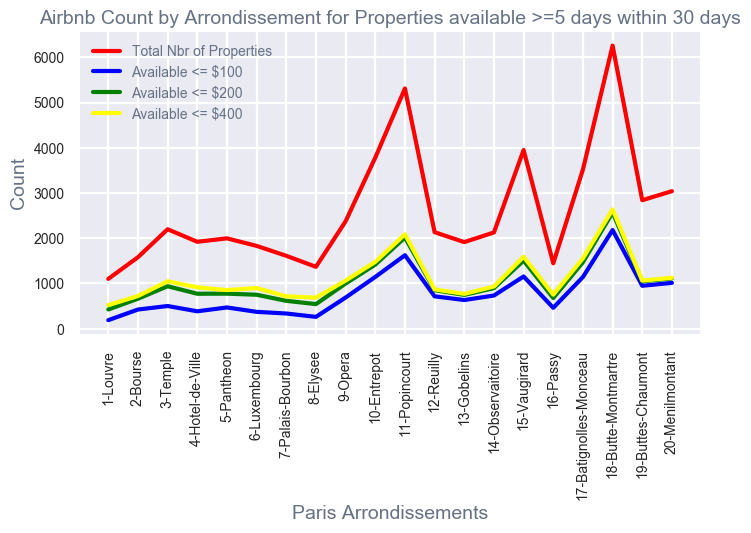

In [70]:
fig = plt.figure(dpi = 100, figsize=(8,4))
#plt.plot(total_all['arrondissement'],total_all['id'], c='black',label="Total Nbr of Properties")
plt.plot(total_by_arr['arrondissement'],total_by_arr['id'], c='red',label="Total Nbr of Properties")
plt.plot(total_Avail_by_arr['arrondissement'],total_Avail_by_arr['id'], c='blue',label="Available <= $100")
plt.plot(total_Avail_by_arr200['arrondissement'],total_Avail_by_arr200['id'], c='green',label="Available <= $200")
plt.plot(total_Avail_by_arr400['arrondissement'],total_Avail_by_arr400['id'], c='yellow',label="Available <= $400")
plt.title("Airbnb Count by Arrondissement for Properties available >=5 days within 30 days", fontsize=14)
plt.xlabel("Paris Arrondissements")
plt.ylabel("Count")
plt.xticks([x for x in range(1,21)],xlabels_text,rotation=90)
plt.legend(fontsize=10)
plt.savefig('../images/Avail_less100.png',bbox_inches='tight')
plt.show()

In [71]:
total_by_arr = dfParis[dfParis.price <= 400].groupby('arrondissement').agg({'id':'count'}).reset_index()
total_Avail_by_arr = dfParis[(dfParis.price <= 100) & (dfParis.availability_60 >= 5)].groupby('arrondissement').agg({'id':'count'}).reset_index()
total_Avail_by_arr200 = dfParis[(dfParis.price <= 200) & (dfParis.availability_60 >= 5)].groupby('arrondissement').agg({'id':'count'}).reset_index()
total_Avail_by_arr400 = dfParis[(dfParis.price <= 400) & (dfParis.availability_60 >= 5)].groupby('arrondissement').agg({'id':'count'}).reset_index()

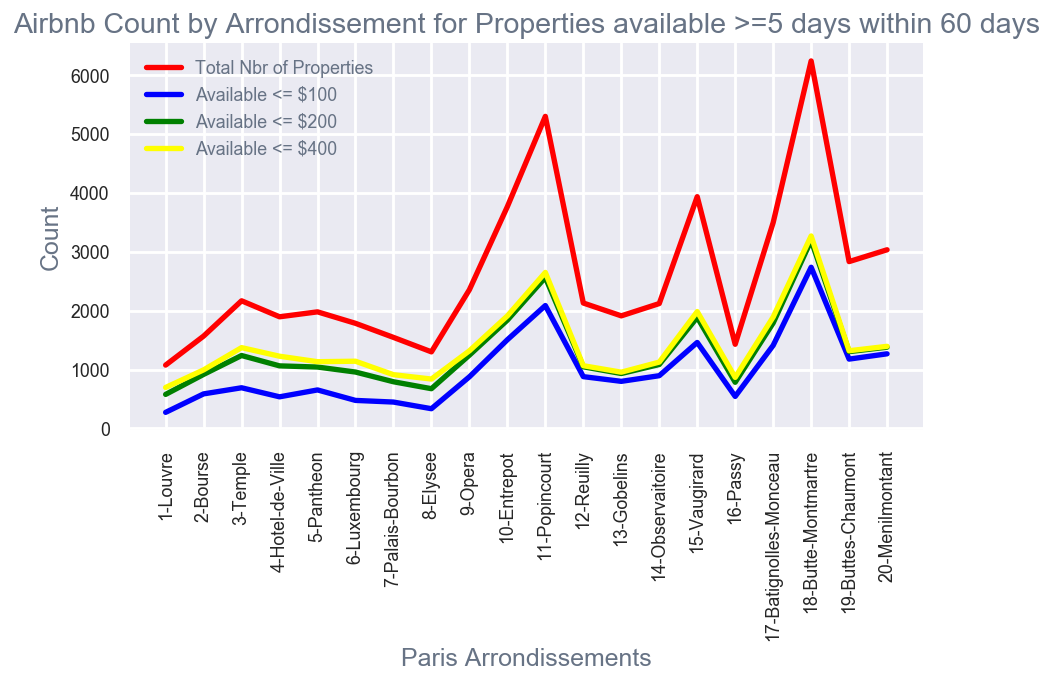

In [72]:
fig = plt.figure(dpi = 128, figsize=(8,4))
#plt.plot(total_all['arrondissement'],total_all['id'], c='black',label="Total Nbr of Properties")
plt.plot(total_by_arr['arrondissement'],total_by_arr['id'], c='red',label="Total Nbr of Properties")
plt.plot(total_Avail_by_arr['arrondissement'],total_Avail_by_arr['id'], c='blue',label="Available <= $100")
plt.plot(total_Avail_by_arr200['arrondissement'],total_Avail_by_arr200['id'], c='green',label="Available <= $200")
plt.plot(total_Avail_by_arr400['arrondissement'],total_Avail_by_arr400['id'], c='yellow',label="Available <= $400")
plt.title("Airbnb Count by Arrondissement for Properties available >=5 days within 60 days", fontsize=16)
plt.xlabel("Paris Arrondissements")
plt.ylabel("Count")
plt.xticks([x for x in range(1,21)],xlabels_text,rotation=90)
plt.legend(fontsize=10)
plt.savefig('../images/Avail_less100_60days.png',bbox_inches='tight')
plt.show()